<a href="https://colab.research.google.com/github/MalihaUCF/Machine-Learning-Course-Assignments-Spring-2019/blob/master/Assignment1/Problem3/Problem3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# We are going to classify all 10 classes of MNIST dataset using Softmax and SGD


#loading MNIST dataset
from keras.datasets import mnist
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

(train_images,train_labels),(test_images,test_labels)=mnist.load_data()  



print('Training Data Shape',train_images.shape)
print('Test Data Shape',test_images.shape)
print('The train and test labels look like this,' ,train_labels.shape,test_labels.shape)


train_images = train_images.reshape(60000, 28*28) 
test_images = test_images.reshape(10000, 28*28)

#Transposing the matrices
train_images = train_images.T 
test_images=test_images.T


print(train_images.shape)
print(train_labels.shape)



Using TensorFlow backend.


11493376/11490434 [==============================] - 1s 0us/step
Training Data Shape (60000, 28, 28)
Test Data Shape (10000, 28, 28)
The train and test labels look like this, (60000,) (10000,)
(784, 60000)
(60000,)


In [0]:

#Normalizing and shuffling the images
train_images = train_images.astype('float32') 
test_images = test_images.astype('float32') 
train_images /= 255 
test_images /= 255

np.random.seed(138)
shuffle_index = np.random.permutation(60000)
print(shuffle_index)
#train_images, train_labels = train_images[:,shuffle_index], train_labels[:,shuffle_index]
print(train_images.shape)
print(train_labels.shape)

#reshaping the train and test labels
train_labels, test_labels = train_labels.reshape(1,60000),test_labels.reshape(1,10000)

print('Y-reshape-',train_labels.shape)
print('Y-reshape-',test_labels.shape)




[45084 33389 21425 ... 33653 57833 58618]
(784, 60000)
(60000,)
Y-reshape- (1, 60000)
Y-reshape- (1, 10000)


(1, 60000, 10)
(10, 60000)


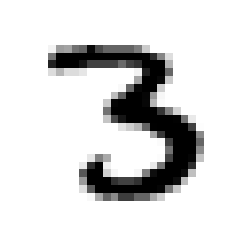

One hot vector [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[3]


In [0]:
#Converting the labels to one hot vectors using numpy 

train_labels_new = np.eye(10)[train_labels.astype('int32')]
test_labels_new=np.eye(10)[test_labels.astype('int32')]

print(train_labels_new.shape)

train_labels_new=train_labels_new.T.reshape(10,60000)
test_labels_new=test_labels_new.T.reshape(10,10000)

print(train_labels_new.shape)


#visualizing an image to see if everything till now is working fine
i = 12
plt.imshow(train_images[:,i].reshape(28,28), cmap = matplotlib.cm.binary)
plt.axis("off")
plt.show()
print('One hot vector',train_labels_new[:,i])
print(train_labels[:,i])

In [0]:
#defining the sigmoid activation

def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s

In [0]:
#Here we define the categorical cross entropy which is the loss function to be used with Softmax activation and multiclass classification

def compute_multiclass_loss(Y, Y_hat):  # categorical cross entropy loss

    L_sum = np.sum(np.multiply(Y, np.log(Y_hat)))   # L=-sum(yk.logak) where ak=e^zk/sum(e^zj)
    m = Y.shape[1]
    L = -(1/m) * L_sum

    return L

In [0]:
#this function splits the training set into slices to train in batches

def mini_batches(X_whole, Y_whole, batchsize):
  for index in range(0, X_whole.shape[0] - batchsize + 1, batchsize):
    batch = slice(index, index + batchsize)
    yield X_whole[batch], Y_whole[batch]

In [0]:

#we define the hyperparameters
learning_rate = 0.01
batch_size=128

X = train_images
Y = train_labels_new #one hot encoded

n_x = X.shape[0]
m = X.shape[1]

#we initialize the weight and bias
W = np.random.randn(n_x, 10) * 0.01
b = np.zeros((1, 1))

#we perform backward propagation here

for i in range(2000):
    Z = np.matmul(W.T, X) + b
    A = np.exp(Z) / np.sum(np.exp(Z), axis=0) #We define softmax here -> ez/sum(ez)

    cost = compute_multiclass_loss(Y, A)  # we call the categorical cross entropy function here

    dW = (1/m) * np.matmul(X, (A-Y).T)
    db = (1/m) * np.sum(A-Y, axis=1, keepdims=True)

    W = W - learning_rate * dW
    b = b - learning_rate * db

    if (i % 100 == 0):
        print("Epoch", i, "cost: ", cost)


Epoch 0 cost:  2.313683460438797
Epoch 100 cost:  1.558805850273726
Epoch 200 cost:  1.1956851967922217
Epoch 300 cost:  1.0001748018810674
Epoch 400 cost:  0.8805394139174488
Epoch 500 cost:  0.7998640326293867
Epoch 600 cost:  0.741562188078741
Epoch 700 cost:  0.6972608813942966
Epoch 800 cost:  0.6623109736750714
Epoch 900 cost:  0.6339295438820168
Epoch 1000 cost:  0.6103485421074648
Epoch 1100 cost:  0.5903896264886369
Epoch 1200 cost:  0.5732361934252469
Epoch 1300 cost:  0.558303707929675
Epoch 1400 cost:  0.5451622087567701
Epoch 1500 cost:  0.5334880173646069
Epoch 1600 cost:  0.5230325514532221
Epoch 1700 cost:  0.513601555226432
Epoch 1800 cost:  0.5050408918450359
Epoch 1900 cost:  0.4972265939660267


In [0]:
#we test our model using sklearn functions, we get 89 % accurcay as can be seen below

from sklearn.metrics import classification_report, confusion_matrix

Z2 = np.matmul(W.T, test_images) + b
A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)

predictions = np.argmax(A2, axis=0)
labels = np.argmax(test_labels_new, axis=0)

#confusion matrix gives us true positives-correct predictions in the diagonal of the matrix
print(confusion_matrix(predictions, labels))

# the classification report shows 89% tets accuracy
print(classification_report(predictions, labels))

[[ 951    0   13    6    2   19   20    4    9   15]
 [   0 1097   13    2    7   11    3   25   10    9]
 [   2    4  859   20    5    5   11   32   13    9]
 [   3    4   26  883    0   54    2    1   34   12]
 [   0    1   20    1  886   22   14   13   12   45]
 [   2    2    1   38    1  694   19    0   25   15]
 [  14    4   22    7   14   20  884    2   16    1]
 [   1    0   24   17    2   11    0  906   13   29]
 [   7   23   45   22    9   42    5    5  826    8]
 [   0    0    9   14   56   14    0   40   16  866]]
              precision    recall  f1-score   support

           0       0.97      0.92      0.94      1039
           1       0.97      0.93      0.95      1177
           2       0.83      0.89      0.86       960
           3       0.87      0.87      0.87      1019
           4       0.90      0.87      0.89      1014
           5       0.78      0.87      0.82       797
           6       0.92      0.90      0.91       984
           7       0.88      0.90   